# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [43]:
import pandas as pd
import numpy as np

import numpy as np 
import pandas as pd 
from scipy import stats # scientific python 

import matplotlib.pyplot as plt 

In [42]:
!pip install scipy


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [91]:
# your answer here
employee= pd.read_csv("Employee.csv")
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
mean=employee.groupby('Department')[['Salary']].mean()
mean

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [9]:
# your answer here-2nd way
pivote = pd.pivot_table(
    employee, 
    values=['Salary'],
    index=['Department'],
    aggfunc={'Salary': [np.mean]}
)
pivote

,Salary
,mean
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [19]:
# your answer here
pivote = pd.pivot_table(
    employee, 
    values=['Salary'],
    index=['Department','Title'],
    aggfunc={'Salary':[np.mean]}
)
pivote

Salary
                       mean
Department Title           
HR         VP          70.0
           analyst     32.5
IT         VP          70.0
           analyst     32.5
           associate   60.0
Sales      associate   55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [23]:
# your answer here
employee.pivot_table(
    index=['Department','Title'], 
    values=['Salary','Years'],
    aggfunc=np.mean)



Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [24]:
# your answer here
pivote = pd.pivot_table(
    employee, 
    values=['Salary','Name'],
    index=['Department'],
    aggfunc={'Salary':'mean','Name':'count'},
)
pivote

,Name,Salary
Department,,
HR,3,45.00
IT,4,48.75
Sales,2,55.00


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [25]:
# your answer here
pivote = pd.pivot_table(
    employee, 
    values=['Salary','Name'],
    index=['Department','Title'],
    aggfunc={'Salary': [np.mean, np.max,np.min,np.std]},
)
pivote


#hay valores vacios porque la poblacion es de una persona

Salary                      
                       amax  amin  mean       std
Department Title                                 
HR         VP          70.0  70.0  70.0       NaN
           analyst     35.0  30.0  32.5  3.535534
IT         VP          70.0  70.0  70.0       NaN
           analyst     35.0  30.0  32.5  3.535534
           associate   60.0  60.0  60.0       NaN
Sales      associate   55.0  55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [27]:
# your answer here
pivote = pd.pivot_table(
    employee, 
    values=['Salary','Name'],
    index=['Department','Title'],
    aggfunc={'Salary': [np.mean, np.max,np.min,np.std]},
    fill_value=0
)
pivote




Salary                     
                       amax amin  mean       std
Department Title                                
HR         VP            70   70  70.0  0.000000
           analyst       35   30  32.5  3.535534
IT         VP            70   70  70.0  0.000000
           analyst       35   30  32.5  3.535534
           associate     60   60  60.0  0.000000
Sales      associate     55   55  55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [29]:
# your answer here
pivote = pd.pivot_table(
    employee, 
    values=['Salary','Name'],
    index=['Department'],
    aggfunc={'Salary':'sum','Name':'count'},

)
pivote


,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [30]:
# your answer here
pivote = pd.pivot_table(
    employee, 
    values=['Salary','Years'],
    index=['Department','Title'],
    aggfunc={'Salary':'mean','Years':'sum'},

)
pivote

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [93]:
# your answer here--Your custom function here
max_dep = pd.pivot_table(
    employee,
    values=['Salary'],
    index=['Department'],
    aggfunc={'Salary': lambda x: (sum(x)-max(x))/(len(x)-1)},
)

max_dep


,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [31]:
# your answer here
fitbit= pd.read_csv("Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [32]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [33]:
# your answer here
fitbit.isnull().sum()

Date                      0
Calorie burned            0
Steps                     0
Distance                  0
Floors                    0
Minutes Sedentary         0
Minutes Lightly Active    0
Minutes Fairly Active     0
Minutes Very Active       0
Activity Calories         0
MinutesOfSleep            0
MinutesOfBeingAwake       0
NumberOfAwakings          0
LengthOfRestInMinutes     0
dtype: int64

In [35]:
fitbit.dtypes


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [36]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [37]:
# your answer here
fitbit[['Steps', 'Minutes Very Active']].corr()


,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

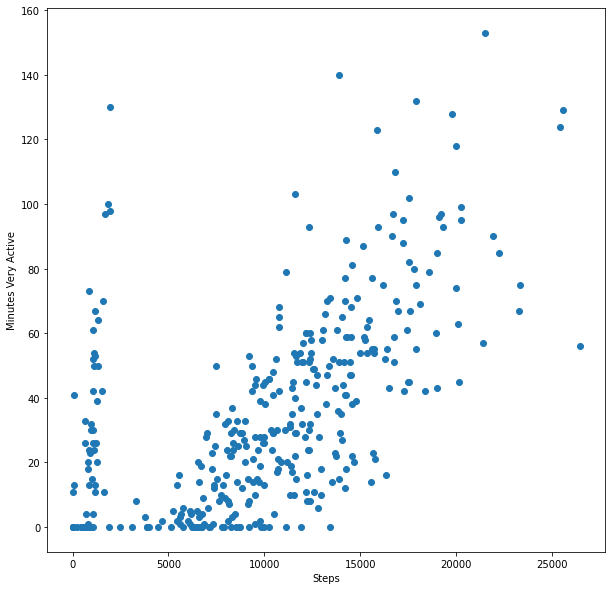

In [45]:
# your answer here
x = fitbit['Steps']
y = fitbit['Minutes Very Active']

plt.figure(figsize=(10, 10))
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.scatter(x, y);

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
podemos ver que ienen una relacion positiva

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [46]:
# your answer here
fitbit[['Steps', 'Minutes Sedentary']].corr()

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

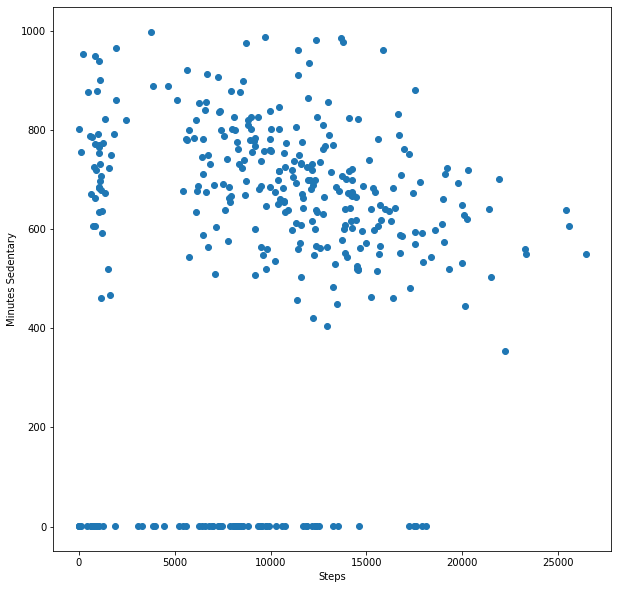

In [47]:
# your answer here
x = fitbit['Steps']
y = fitbit['Minutes Sedentary']

plt.figure(figsize=(10, 10))
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
plt.scatter(x, y);

In [22]:
# Your comment here
se observa que no hay relacion entre las variables, y hay mucha dispersion en los datos.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [48]:
# your answer here
fitbit[['Steps', 'MinutesOfSleep']].corr()

,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

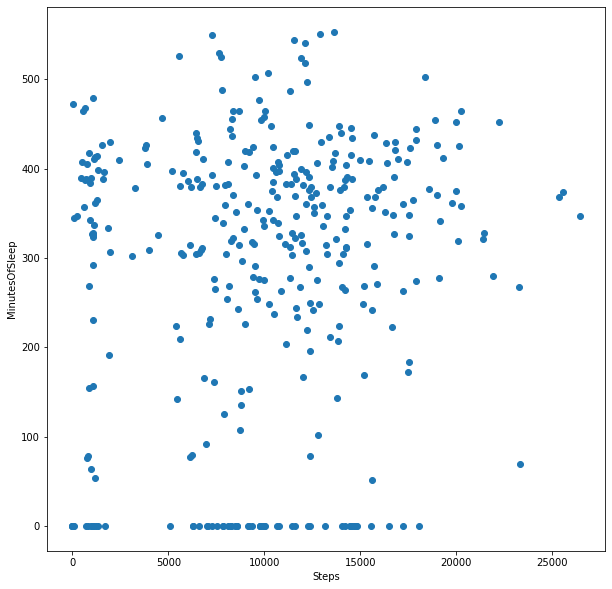

In [49]:
# your answer here
x = fitbit['Steps']
y = fitbit['MinutesOfSleep']

plt.figure(figsize=(10, 10))
plt.xlabel('Steps')
plt.ylabel('MinutesOfSleep')
plt.scatter(x, y);

# las variables no tienen relacion entre ellas.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [58]:
# your answer here
cor_fit=fitbit[['Steps', 'Calorie burned','Floors','Minutes Sedentary','Minutes Very Active','MinutesOfSleep']].corr()


In [59]:
#Print cor_fit
cor_fit

,Steps,Calorie burned,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,1.000000,0.255305,0.306511,0.076906,0.571452,0.130986
Calorie burned,0.255305,1.000000,0.130757,0.125353,0.197881,0.011485
Floors,0.306511,0.130757,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.076906,0.125353,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.571452,0.197881,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.130986,0.011485,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [62]:
# your answer here
cor_fit.sort_values(by='Steps',ascending=False)

'Las variables que mas se relacionan son Minutes Sedentary y Steps'

,Steps,Calorie burned,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,1.000000,0.255305,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.571452,0.197881,0.399503,0.105963,1.000000,0.108018
Floors,0.306511,0.130757,1.000000,0.057812,0.399503,0.069464
Calorie burned,0.255305,1.000000,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.130986,0.011485,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.076906,0.125353,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [81]:
# your answer here
time_grades= pd.read_csv("Time_Grades.csv")
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [82]:
#Print time_grades
print(time_grades)

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


#### Show visually the frequency distribution of the time_grades dataset.

<AxesSubplot:>

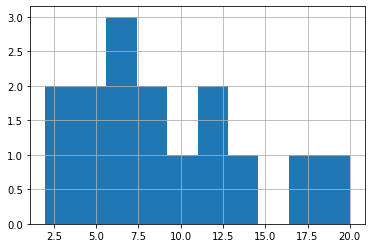

In [83]:
# your answer here
time_grades['Study time'].hist()

<AxesSubplot:>

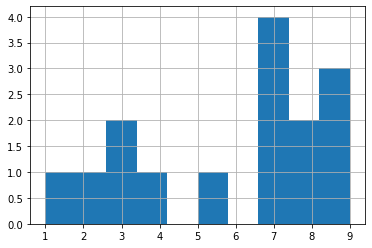

In [84]:
time_grades['Grade'].hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [85]:
# your answer here-Pearson 
time_grades.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [86]:
## your answer here-Spearman
time_grades.corr('spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [88]:
time_grades.corr('kendall')

,Study time,Grade
Study time,1.000000,0.561905
Grade,0.561905,1.000000


In [90]:
stats.kendalltau(time_grades['Study time'], time_grades['Grade'])


KendalltauResult(correlation=0.6978603023791088, pvalue=0.0005011784654299386)

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

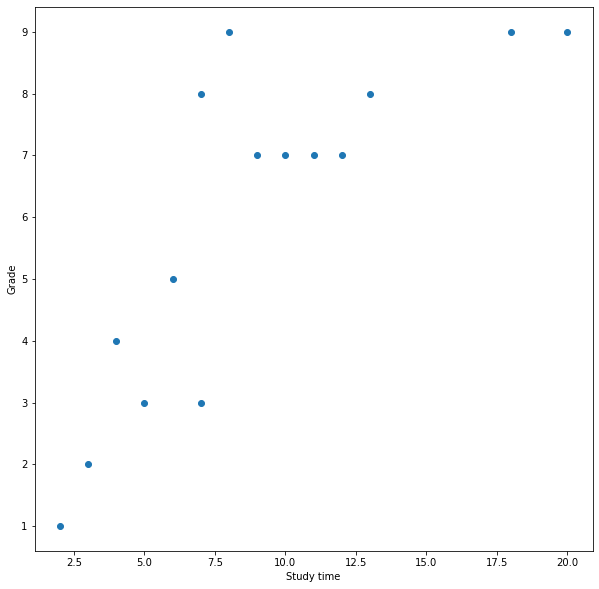

In [79]:
# your answer here
x = time_grades['Study time']
y = time_grades['Grade']

plt.figure(figsize=(10, 10))
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.scatter(x, y);


In [34]:
#your comment here
se puede obervar que la relacion positiva, sin embargo, hay pocos datos en este data set

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
la de pearson mide relaciones lineales,y el coeficiente de correlación de Spearman es una medida no paramétrica de la correlación de rango (dependencia estadística del ranking entre dos variables)